In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Do smokers have higher insurance charges than non-smokers?

1. State the Null Hypothesis & Alternate Hypothesis

 (Null Hypothesis): Smokers have higher insurance charges vs non-smokers.
 
 (Alternative Hypothesis): Smokers don't have higher insurance charges vs non-smokers.

2. Select the correct test according to the data type and number of samples

- Data type: Numerical Data
- Number of samples: Two groups/samples
- Test: 2-sample T-test.

3. Test the assumptions of your selected test.

- No significant outliers
- Normality
- Equal Variance

In [3]:
## check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
 df['smoker'].describe()


count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [5]:
## create a column that easily separates our groups
df['smoker_yes'] = df['smoker'].str.contains('yes')
df['smoker_yes'].value_counts()

False    1064
True      274
Name: smoker_yes, dtype: int64

In [6]:
## save list of columns needed for each group
needed_cols = ['smoker_yes','charges']

df[needed_cols]

,smoker_yes,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [7]:
## save male team in separate variable
smoker_no = df.loc[ df['smoker_yes']==False, needed_cols]
smoker_no

,smoker_yes,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [8]:
## save female team in separate variables
smoker_yes = df.loc[ df['smoker_yes']==True, needed_cols]
smoker_yes

,smoker_yes,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [9]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([smoker_yes,smoker_no])
plot_df

,smoker_yes,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


<AxesSubplot: xlabel='smoker_yes', ylabel='charges'>

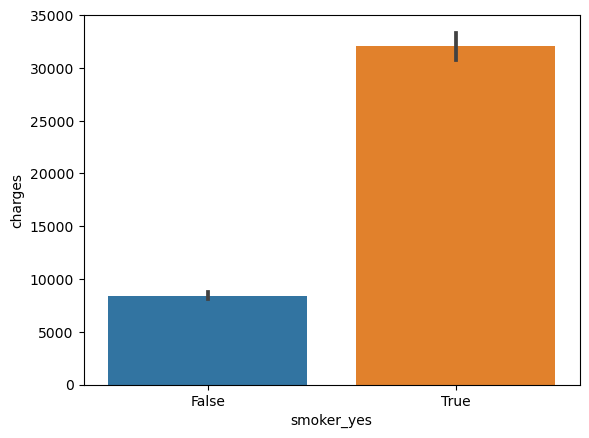

In [10]:
## visualize the group means
sns.barplot(data=plot_df, x='smoker_yes',y='charges')

3. Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [11]:
## Saving JUST the numeric col as final group variables
smoker_group = smoker_yes['charges']
nonsmoker_group = smoker_no['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [12]:
## Check female group for outliers
outliers_yes = np.abs(stats.zscore(smoker_group)) > 3
outliers_yes.sum()

0

In [13]:
outliers_no = np.abs(stats.zscore(nonsmoker_group)) > 3
outliers_no.sum()

24

In [14]:
nonsmoker_group = nonsmoker_group.loc[~outliers_no]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

### Test for Normality

In [15]:
## Check female group for normality
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [16]:
len(smoker_group)

274

In [17]:
## Check female group for normality
result = stats.normaltest(nonsmoker_group)
result.pvalue

2.6945416315543976e-36

In [18]:
len(nonsmoker_group)

1040

- since both groups have n > 15, we can safely ignore the assumption of normality.

### Test for Equal Variances

In [19]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group, nonsmoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [20]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [21]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [22]:
smoker_group.mean()

32050.23183153284

In [23]:
nonsmoker_group.mean()

7939.8608446721155

### Conclusion

The p-value < .05 for the welch's t-test. 

We fail to reject the null hypothesis. Smokers do have higher insurance charges than non smokers.

## Q2. Are men more likely to smoke than women?

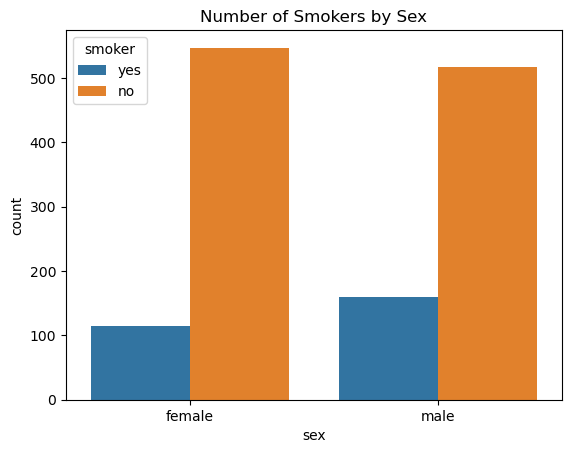

In [24]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

1. <b> State your Null Hypothesis and Alternative Hypothesis

Null Hypothesis (H₀): There is no significant difference in smoking rates between men and women.

Alternative Hypothesis (H₁): There is a significant difference in smoking rates between men and women. 

2. <b> Select the correct test according to the data type and number of samples

- Data type: Categorical
- Number of samples: Two groups/samples
- Test: Chi-square test.

3. <b> Test the assumptions of your selected test.

- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

### Getting the Contingency Table with pd.crosstab

In [25]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [26]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [27]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Since our p < .05, we reject the null hypothesis that there is no significant difference in smoking rates between men and women.

- This means that we accept the alternate hypothesis and conclude that there is a significant difference in smoking rates between men and women.

## Q3. Do different regions have different charges, on average?

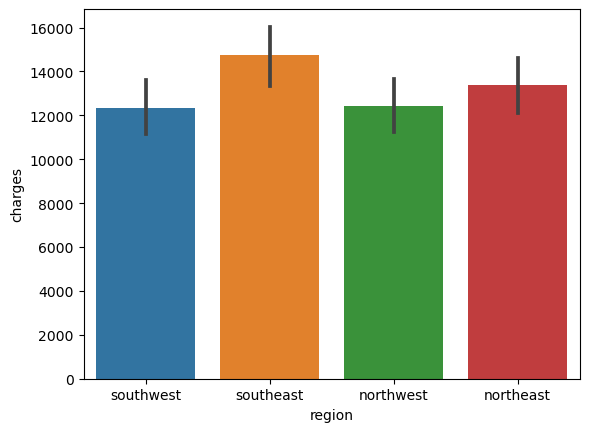

In [28]:
sns.barplot(data=df, x='region',y='charges');

1. <b> State your Null Hypothesis and Alternative Hypothesis

Null Hypothesis (H₀): There is no significant difference in charges across different regions.

Alternative Hypothesis (H₁): There is a significant difference in charges across different regions.

2. <b> Select the correct test according to the data type and number of samples

- Data type: Numerical
- Number of samples: More than 2
- Test: ANOVA

### Seperating Groups

In [29]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assumptions

In [30]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [31]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [32]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [33]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Tukey's Pairwise Multiple Comparisons Test

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = df['charges']
labels = df['region']

In [35]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- Since our p < .05, we reject the null hypothesis that there is no significant difference in charges among regions

- This means that we accept the alternate hypothesis and conclude that there is a significant difference in charges among regions